# Embeddings via API

In this notebook, we demonstrate how to obtain embeddings using OpenAI's API.

In [1]:
%load_ext dotenv
%dotenv ../../05_src/.secrets

In [2]:
documents = [
    # Freedom
    "Freedom consists not in doing what we like, but in having the right to do what we ought.",
    "Those who deny freedom to others deserve it not for themselves.",
    "Liberty, when it begins to take root, is a plant of rapid growth.",
    "Freedom lies in being bold.",
    "Is freedom anything else than the right to live as we wish?",
    "I am no bird and no net ensnares me: I am a free human being with an independent will.",
    "The secret to happiness is freedom... And the secret to freedom is courage."
    "Freedom is the oxygen of the soul.", 
    "Life without liberty is like a body without spirit."
    # Friendship
    "There is nothing on this earth more to be prized than true friendship.",
    "There are no strangers here; Only friends you haven’t yet met.",
    "Friendship is the only cement that will ever hold the world together.",
    "A true friend is someone who is there for you when he'd rather be anywhere else.",
    "Friendship is the golden thread that ties the heart of all the world.", 
    "Your friend is the man who knows all about you and still likes you.",
    "A single rose can be my garden... a single friend, my world."
    # Food
    "One cannot think well, love well, sleep well, if one has not dined well.",
    "Let food be thy medicine and medicine be thy food.",
    "People who love to eat are always the best people.",
    "The only way to get rid of a temptation is to yield to it.",
    "Food is our common ground, a universal experience.",
    "Life is uncertain. Eat dessert first.",
    "All you need is love. But a little chocolate now and then doesn't hurt."
]

OpenAI's text embeddings are available through the embeddings API. A key reference is the [Embeddings API documentation](https://platform.openai.com/docs/guides/embeddings).

There are three models that we can choose from, depending on [the size of the hidden representation, latency, and cost](https://platform.openai.com/docs/guides/embeddings#embedding-models):

+ `text-embedding-3-small`
+ `text-embedding-3-large`
+ `text-embedding-ada-002`

A simple implementation would call the embeddings API for each phrase.

In [3]:

from openai import OpenAI
client = OpenAI()

def get_embedding(text, model="text-embedding-3-small"):
    text = text.replace("\n", " ")
    return client.embeddings.create(input=[text], model=model).data[0].embedding

embeddings = [get_embedding(doc) for doc in documents]

In [4]:
import numpy as np
embeddings_array = np.array(embeddings)
embeddings_array

array([[ 0.026252  ,  0.02161384,  0.03242076, ..., -0.00049534,
        -0.00518315,  0.0040497 ],
       [ 0.01433144,  0.01657806, -0.01349205, ...,  0.03683465,
         0.01705948, -0.00796808],
       [ 0.03360856,  0.01991314,  0.04533183, ..., -0.00120605,
        -0.01052493, -0.00722433],
       ...,
       [-0.04753996, -0.00545149, -0.00315285, ...,  0.04108293,
        -0.0263797 , -0.02297631],
       [ 0.02532853, -0.04533948, -0.02882695, ...,  0.02111644,
        -0.00210255,  0.00445698],
       [ 0.0240931 , -0.01395962, -0.0138089 , ..., -0.02008145,
        -0.01604661,  0.00398267]], shape=(20, 1536))

## A Note on Similarity

One important characteristic of embeddings is that they can be used to measure the relatedness of text strings. To see this, we can plot a reduced forms of the embeddings using Principal Components Analysis (PCA).

Similarity between two texts can be understood in two ways:

+ Lexical similarity refers to similarity of the choice of words. For example, "cats are fun" and "cats are furry" are similar in that they have two words in common.
+ Semantical similarity refers to similarity in the words meaning. For example, "the bottle is empty" and "there is nothing in the bottle" are similar in meaning, but the phrases do not have many words in common.

Using count or tf-idf tokenization, we can calculate lexical similarity; using embeddings, we can compute (model-dependent) lexical similarity.

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
reduced_embeddings = pca.fit_transform(embeddings_array)

Some labels are too long, can't fit inside the X axis
Some labels are too long, can't fit inside the X axis
Some labels are too long, can't fit inside the X axis
Some labels are too long, can't fit inside the X axis
Some labels are too long, can't fit inside the X axis
Some labels are too long, can't fit inside the X axis
Some labels are too long, can't fit inside the X axis
Some labels are too long, can't fit inside the X axis
Some labels are too long, can't fit inside the X axis
Some labels are too long, can't fit inside the X axis
Some labels are too long, can't fit inside the X axis
Some labels are too long, can't fit inside the X axis
Some labels are too long, can't fit inside the X axis
Some labels are too long, can't fit inside the X axis
Some labels are too long, can't fit inside the X axis
Some labels are too long, can't fit inside the X axis
Some labels are too long, can't fit inside the X axis
Some labels are too long, can't fit inside the X axis
Some labels are too long, ca

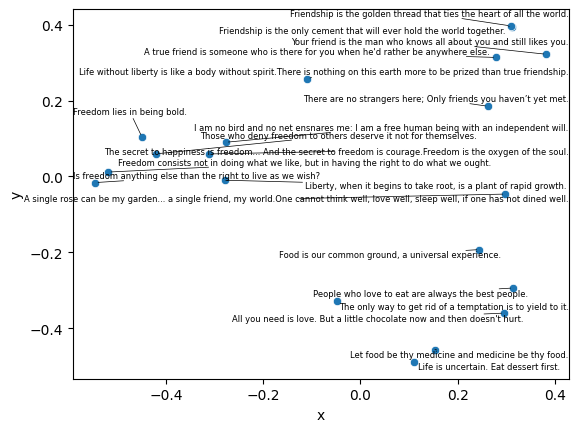

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from adjustText import adjust_text

# Sample data
df = pd.DataFrame(reduced_embeddings, columns=["x", "y"]).assign(label = documents)

# Create the scatter plot
fig, ax = plt.subplots()
sns.scatterplot(x='x', y='y', data=df, ax=ax)

# Add labels
texts = []
for i, row in df.iterrows():
    texts.append(ax.text(row['x'], row['y'], row['label'], fontsize=6))

# Adjust text positions to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5))

plt.show()